In [1]:
import numpy as np
import jsoncfg
import matplotlib.pyplot as plt
import decimal

In [149]:
json_c = jsoncfg.load("/home/johughes/serialize_c.json")['data']
dd = {}
for key in json_c[0].keys():
    if type(json_c[0][key]) == str:
        dd[key] = np.array([float.fromhex(step[key]) for step in json_c])
    else:
        dd[key] = np.array([step[key] for step in json_c])

#data_c = type('data', (object,), dd)
data_c = dd

In [156]:
data_rs = jsoncfg.load("roberts_rs.json")['data']
data = data_rs
data_rs = {
    'ida_phi': np.array([step['ida_phi']['data'] for step in data_rs]).reshape((len(data_rs), 6, 3)),
    'ida_psi': np.array([step['ida_psi']['data'] for step in data_rs]),
    'ida_alpha': np.array([step['ida_alpha']['data'] for step in data_rs]),
    'ida_beta': np.array([step['ida_beta']['data'] for step in data_rs]),
    'ida_sigma': np.array([step['ida_sigma']['data'] for step in data_rs]),
    'ida_gamma': np.array([step['ida_gamma']['data'] for step in data_rs]),
    'ida_yy': np.array([step['nlp']['ida_yy']['data'] for step in data_rs]),
    'ida_yp': np.array([step['nlp']['ida_yp']['data'] for step in data_rs]),
    'ida_yypredict': np.array([step['nlp']['ida_yypredict']['data'] for step in data_rs]),
    'ida_yppredict': np.array([step['nlp']['ida_yppredict']['data'] for step in data_rs]),
    'ida_delta': np.array([step['ida_delta']['data'] for step in data_rs]),
    'ida_savres': np.array([step['nlp']['ida_savres']['data'] for step in data_rs]),
    'ida_ee': np.array([step['ida_ee']['data'] for step in data_rs]),
    'ida_ewt': np.array([step['nlp']['ida_ewt']['data'] for step in data_rs]),
    'ida_kk': np.array([step['ida_kk'] for step in data_rs]),
    'ida_kused': np.array([step['ida_kused'] for step in data_rs]),
    'ida_knew': np.array([step['ida_knew'] for step in data_rs]),
    'ida_phase': np.array([step['ida_phase'] for step in data_rs]),
    'ida_ns': np.array([step['ida_ns'] for step in data_rs]),
    'ida_hin': np.array([step['ida_hin'] for step in data_rs]),
    'ida_h0u':np.array([step['ida_h0u'] for step in data_rs]),
    'ida_hh': np.array([step['ida_hh'] for step in data_rs]),
    'ida_hused': np.array([step['ida_hused'] for step in data_rs]),
    'ida_rr': np.array([step['ida_rr'] for step in data_rs]),
    'ida_tn': np.array([step['nlp']['ida_tn'] for step in data_rs]),
    'ida_tretlast': np.array([step['ida_tretlast'] for step in data_rs]),
    'ida_cj': np.array([step['nlp']['lp']['ida_cj'] for step in data_rs]),
    'ida_cjlast':np.array([step['ida_cjlast'] for step in data_rs]),
    'ida_cjold': np.array([step['nlp']['lp']['ida_cjold'] for step in data_rs]),
    'ida_cjratio': np.array([step['nlp']['lp']['ida_cjratio'] for step in data_rs]),
    'ida_ss': np.array([step['nlp']['ida_ss'] for step in data_rs]),
    'ida_oldnrm': np.array([step['nlp']['ida_oldnrm'] for step in data_rs]),
    'ida_epsNewt': np.array([step['ida_eps_newt'] for step in data_rs]),
    'ida_epcon': np.array([step['ida_epcon'] for step in data_rs]),
    'ida_toldel': np.array([step['nlp']['ida_toldel'] for step in data_rs]),
    'ida_hmax_inv': np.array([step['ida_hmax_inv'] for step in data_rs]),
    'ida_nst': np.array([step['counters']['ida_nst'] for step in data_rs]),
    'ida_nre': np.array([step['nlp']['ida_nre'] for step in data_rs]),
    'ida_ncfn': np.array([step['counters']['ida_ncfn'] for step in data_rs]),
    'ida_netf': np.array([step['counters']['ida_netf'] for step in data_rs]),
    'ida_nni': np.array([step['counters']['ida_nni'] for step in data_rs]),
    'ida_nsetups': np.array([step['nlp']['ida_nsetups'] for step in data_rs]),
    'ida_maxord': np.array([step['ida_maxord'] for step in data_rs]),
    'mat_J': np.array([step['nlp']['lp']['mat_j']['data'] for step in data_rs]).reshape((len(data), 3, 3)),
    'nje': np.array([step['nlp']['lp']['nje'] for step in data_rs]),
    'nls_delta': np.array([step['nls']['delta']['data'] for step in data_rs]),
    'nls_curiter': np.array([step['nls']['curiter'] for step in data_rs]),
    'nls_niters': np.array([step['nls']['niters'] for step in data_rs]),
    'nls_nconvfails': np.array([step['nls']['nconvfails'] for step in data_rs]),
}
#data_rs = type('data', (object,), dd)
display(len(data_rs['ida_nst']))

377

In [157]:
for frame in range(0, min(len(data_rs['ida_ns']), len(data_c['ida_ns']))):
    for key in data_c.keys():
        if not np.allclose(data_c[key][frame], data_rs[key][frame], atol=1e-23, rtol=1e-20):
            print("Fame {} Step {}: {}".format(frame, data_c['ida_nst'][frame], key))

In [155]:
#plt.plot(data_rs['ida_yy'][0:5,2] - data_c['ida_yy'][0:5, 2], '-o')
#plt.plot(data_rs['ida_yp'][0:32] - data_c['ida_yp'][0:32], '-o')
#plt.plot(data_rs['ida_delta'][0:15] - data_c['ida_delta'][0:15], '-o')
#plt.plot(data_rs['ida_ee'][0:32] - data_c['ida_ee'][0:32], '-o')
#plt.plot(data_rs['ida_ewt'][0:10] - data_c['ida_ewt'][0:10], '-o')
plt.plot(data_rs['ida_cvals'][0:] - data_c['ida_cvals'][0:], 'o-')

KeyError: 'ida_cvals'

In [131]:
#display(data_c['ida_delta'] - data_rs['ida_delta'][:30])
#plt.plot(data_rs['ida_yy'][25:150,:] - data_c['ida_yy'][25:150, :], '-')
#plt.plot(data_rs['ida_savres'][0:35,1] - data_c['ida_savres'][0:35,1], 'x-')
#plt.plot(data_rs['ida_ee'][60:70] - data_c['ida_ee'][60:70], 'x-')
#plt.plot(data_rs['ida_yypredict'][0:7] - data_c['ida_yypredict'][0:7] - 0.0, 'o-')
display(data_rs['ida_phi'][0:9] - data_c['ida_phi'][0:9], 'o-')
#plt.plot(data_c['ida_ss'][10:50] - 0*data_c['ida_ss'][10:50], 'o-')
#plt.plot(data_c['ida_phase'][0:10])
#plt.plot(range(60,120), data_rs['ida_ee'][60:120] - data_c['ida_ee'][60:120], 'x-')

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0

'o-'

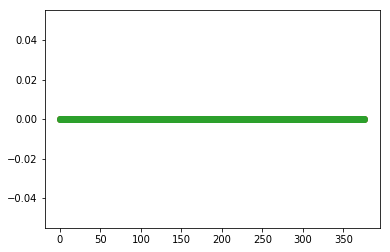

In [159]:
plt.plot(data_c['ida_yp'][:] - data_rs['ida_yp'][:],'-o')